In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns

In [79]:
df = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\collapsed.csv')

In [ ]:
# Using the number of ratings as an approximation of popularity, 
# let's see which feature is the best predictor of the number of rating a book will recieve.

In [47]:
pd.options.display.max_columns = None

In [48]:
df.head()

,Unnamed: 0.1,book_id,Unnamed: 0,rating,text_reviews_count,original_publication_year,ratings_count,month_diff,time_cat,BERT_sent,overall_rating,over_3m_BERT,over_6m_BERT,over1y_BERT,3m_BERT,6m_BERT,1y_BERT,3m_rating,6m_rating,1y_rating,over_3m_rating,over_6m_rating,over1y_rating
0,0,50,8.940140e+05,3.580645,10771.0,1986.0,238317.0,319.383226,200.000000,0.782367,3.681370,0.782367,0.782367,0.782367,NaN,NaN,NaN,NaN,NaN,NaN,3.580645,3.580645,3.580645
1,1,57,2.727244e+06,2.000000,4.0,2005.0,160.0,59.666667,7.333333,0.598914,3.737500,0.598914,0.598914,0.598914,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000
2,2,511,3.280334e+06,3.400000,15.0,2006.0,471.0,73.000000,45.000000,0.871135,3.774947,0.871135,0.871135,0.871135,NaN,NaN,NaN,NaN,NaN,NaN,3.400000,3.400000,3.400000
3,3,760,3.042359e+06,3.491848,3140.0,2004.0,51676.0,105.086957,79.538043,0.736976,3.586868,0.736976,0.736976,0.736976,NaN,NaN,NaN,NaN,NaN,NaN,3.491848,3.491848,3.491848
4,4,852,2.075330e+06,0.000000,8.0,2005.0,27.0,56.000000,7.500000,0.540319,3.740741,0.540319,0.540319,0.540319,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [80]:
df.drop(['Unnamed: 0.1','book_id','Unnamed: 0','text_reviews_count','original_publication_year','month_diff','time_cat','overall_rating'], axis=1, inplace=True)

In [100]:
y.describe()

count    4.381200e+04
mean     3.115085e+03
std      3.637517e+04
min      1.000000e+02
25%      2.000000e+02
50%      5.000000e+02
75%      1.400000e+03
max      5.066600e+06
Name: rating_count_round, dtype: float64

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sentiment distribution')

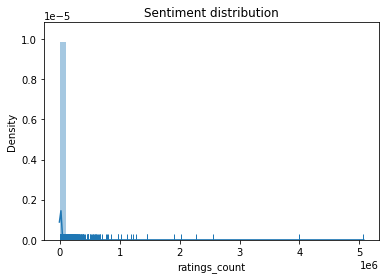

In [13]:
sns.distplot(df.ratings_count,rug=True).set_title('Sentiment distribution')

In [81]:
df = df.drop(df[df.ratings_count < 100].index)

In [82]:
df['rating_count_round'] = df.ratings_count.round(decimals=-2)

In [52]:
df.drop(['3m_BERT','over_3m_BERT','3m_rating','over_3m_rating'], axis=1, inplace=True)

In [20]:
df.drop(['1y_BERT','1y_rating','over1y_BERT','over1y_rating'], axis=1, inplace=True)

In [34]:
df.head()

,rating,ratings_count,BERT_sent,overall_rating,over_3m_BERT,over_6m_BERT,over1y_BERT,3m_BERT,6m_BERT,1y_BERT,3m_rating,6m_rating,1y_rating,over_3m_rating,over_6m_rating,over1y_rating
0,3.580645,238317.0,0.782367,3.681370,0.782367,0.782367,0.782367,NaN,NaN,NaN,NaN,NaN,NaN,3.580645,3.580645,3.580645
1,2.000000,160.0,0.598914,3.737500,0.598914,0.598914,0.598914,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000
2,3.400000,471.0,0.871135,3.774947,0.871135,0.871135,0.871135,NaN,NaN,NaN,NaN,NaN,NaN,3.400000,3.400000,3.400000
3,3.491848,51676.0,0.736976,3.586868,0.736976,0.736976,0.736976,NaN,NaN,NaN,NaN,NaN,NaN,3.491848,3.491848,3.491848
4,0.000000,27.0,0.540319,3.740741,0.540319,0.540319,0.540319,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [83]:
df = df.dropna()

In [84]:
df.shape

(43812, 16)

In [85]:
y = df.rating_count_round
df.drop(['ratings_count','rating_count_round'],axis=1, inplace=True)
X = df

In [86]:
feat_labels = ['rating','BERT_sent','over_3m_BERT','over_6m_BERT','over1y_BERT','3m_BERT','6m_BERT','1y_BERT','3m_rating','6m_rating','1y_rating','over_3m_rating','over_6m_rating','over1y_rating']


In [87]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)



In [88]:
# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [98]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, (clf.feature_importances_*100).round(2)):
    print(feature)

('rating', 7.09)
('BERT_sent', 7.6)
('over_3m_BERT', 7.91)
('over_6m_BERT', 8.02)
('over1y_BERT', 8.16)
('3m_BERT', 7.73)
('6m_BERT', 7.59)
('1y_BERT', 7.68)
('3m_rating', 6.05)
('6m_rating', 6.21)
('1y_rating', 6.62)
('over_3m_rating', 6.78)
('over_6m_rating', 6.46)
('over1y_rating', 6.09)
